# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
dfnews=pd.read_csv("/content/abtest.csv")
dfnews

user_id      group landing_page  time_spent_on_the_page converted  \
0    546592    control          old                    3.48        no   
1    546468  treatment          new                    7.13       yes   
2    546462  treatment          new                    4.40        no   
3    546567    control          old                    3.02        no   
4    546459  treatment          new                    4.75       yes   
..      ...        ...          ...                     ...       ...   
95   546446  treatment          new                    5.15        no   
96   546544    control          old                    6.52       yes   
97   546472  treatment          new                    7.07       yes   
98   546481  treatment          new                    6.20       yes   
99   546483  treatment          new                    5.86       yes   

   language_preferred  
0             Spanish  
1             English  
2             Spanish  
3              French  
4             Spanish  
..                ...  
95            Spanish  
96            English  
97            Spanish  
98            Spanish  
99            English  

[100 rows x 6 columns]

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#Viewing the first few rows of the dataset
dfnews.head()

user_id      group landing_page  time_spent_on_the_page converted  \
0   546592    control          old                    3.48        no   
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
3   546567    control          old                    3.02        no   
4   546459  treatment          new                    4.75       yes   

  language_preferred  
0            Spanish  
1            English  
2            Spanish  
3             French  
4            Spanish

In [ ]:
##Viewing the last few rows of the dataset
dfnews.tail()

user_id      group landing_page  time_spent_on_the_page converted  \
95   546446  treatment          new                    5.15        no   
96   546544    control          old                    6.52       yes   
97   546472  treatment          new                    7.07       yes   
98   546481  treatment          new                    6.20       yes   
99   546483  treatment          new                    5.86       yes   

   language_preferred  
95            Spanish  
96            English  
97            Spanish  
98            Spanish  
99            English

In [ ]:
#Checking the shape of the dataset
dfnews.shape

(100, 6)

In [ ]:
#Getting the statistical summary for the variables
dfnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 3 types of data in the dataset:

int64: 'user_id'

float64: 'time_spent_on_the_page'

object: 'group', 'landing_page', 'converted', 'language_preferred'

In [ ]:
dfnews.describe().T

count         mean        std        min        25%  \
user_id                 100.0  546517.0000  52.295779  546443.00  546467.75   
time_spent_on_the_page  100.0       5.3778   2.378166       0.19       3.88   

                               50%          75%        max  
user_id                 546492.500  546567.2500  546592.00  
time_spent_on_the_page       5.415       7.0225      10.71

1. There are 2 numerical variables, user_id and time_spent_on_the_page.

2. user_idis just a serialisation of records

3. time_spent_on_the_page has a mean of time_spent_on_the_page and a standard deviation of 2.378

4. time_spent_on_the_page has a minimum of 0.19 and a maximum of 10.71. Meaning that the user that spent the least time on the page spent 0.19 minutes while the one spending most time was there for 10.71 minutes

5. In the numerical variable, 'time_spent_on_the_page', the mean is close to the median (50th percentile) suggesting that the data is approximately normally distributed or symmetrically distributed.

6. The IQR (the difference between the 75th and 25th percentile values) is between 3.88 and 7.02. Assuming it is a normal distribution, approximately 68% of the data falls within one standard deviation of the mean. .

In [ ]:
dfnews.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing value

In [ ]:
dfnews.duplicated().sum()

0

There are no duplicated values in the data

In [ ]:
dfnews.describe(include="object").T

count unique      top freq
group                100      2  control   50
landing_page         100      2      old   50
converted            100      2      yes   54
language_preferred   100      3  Spanish   34

For the categorical variables:
1. "group" has 2 unique values with "control" constituting of 50 entries or 50% of the entries
2. "landing_page" has 2 unique values with "old" constituting of 50 entries or 50% of the entries
3. "converted" has 2 unique values with "yes" constituting of 54 entries or 54% of the entries
4. "language_preferred" has 3 unique values with "Spanish" constituting of 34 entries or 34% of the entries

### Univariate Analysis

In [ ]:
dfnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
dfnews.group.value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

Group has 50 entries with value "control" and 50 entries with value "treatment"

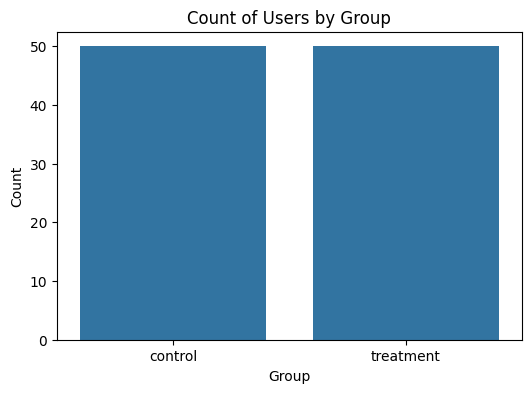

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=dfnews, x='group')
plt.title('Count of Users by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

1. Users are divided into two groups: control and treatment. Each has group has 50 users.

2. The sample has therefore been randomly split into two equal-sized groups, with each group having an equal chance of being assigned to the control or treatment group.

In [ ]:
dfnews.landing_page.value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

landing_page has 50 entries with value "old" and 50 entries with value "new"

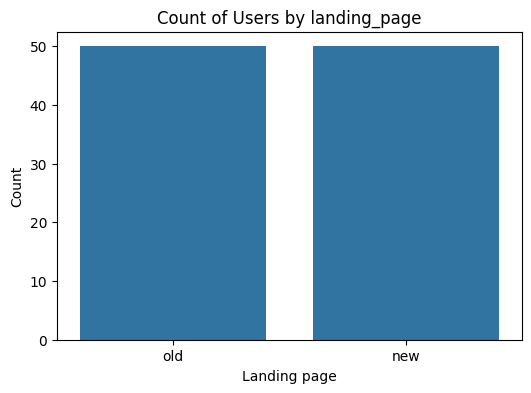

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=dfnews, x='landing_page')
plt.title('Count of Users by landing_page')
plt.xlabel('Landing page')
plt.ylabel('Count')
plt.show()

1. 50 of the users' landing page is the old (existing) version and 50 users' landing page is the new version.
2. The sample has therefore been randomly split into two equal-sized groups, with each group having an equal chance of being assigned to the old or new landing page.
3. It is important to establish if the users landing page depends on the "group" above

In [ ]:
dftest=dfnews.copy()
dftest


user_id      group landing_page  time_spent_on_the_page converted  \
0    546592    control          old                    3.48        no   
1    546468  treatment          new                    7.13       yes   
2    546462  treatment          new                    4.40        no   
3    546567    control          old                    3.02        no   
4    546459  treatment          new                    4.75       yes   
..      ...        ...          ...                     ...       ...   
95   546446  treatment          new                    5.15        no   
96   546544    control          old                    6.52       yes   
97   546472  treatment          new                    7.07       yes   
98   546481  treatment          new                    6.20       yes   
99   546483  treatment          new                    5.86       yes   

   language_preferred  
0             Spanish  
1             English  
2             Spanish  
3              French  
4             Spanish  
..                ...  
95            Spanish  
96            English  
97            Spanish  
98            Spanish  
99            English  

[100 rows x 6 columns]

In [ ]:
dfgroup=dftest.query('group=="control"')
dfgroup.head()





user_id    group landing_page  time_spent_on_the_page converted  \
0   546592  control          old                    3.48        no   
3   546567  control          old                    3.02        no   
5   546558  control          old                    5.28       yes   
7   546581  control          old                    6.53       yes   
9   546548  control          old                    2.08        no   

  language_preferred  
0            Spanish  
3             French  
5            English  
7            Spanish  
9            English

In [ ]:
dfgroup.shape

(50, 6)

In [ ]:
dfgroup.describe(include="object").T

count unique      top freq
group                 50      1  control   50
landing_page          50      1      old   50
converted             50      2       no   29
language_preferred    50      3  Spanish   17

All the users on the "control" group, landed on the "old" page

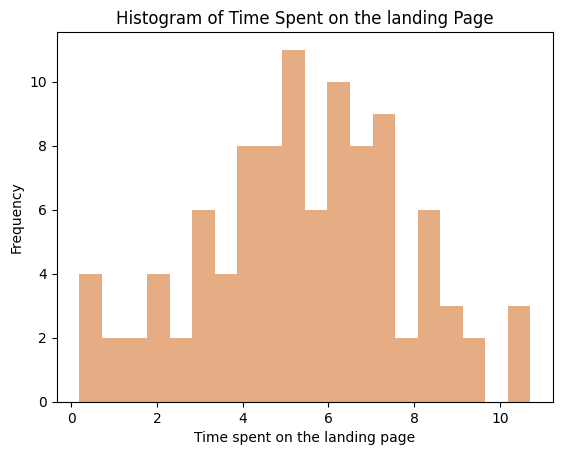

In [ ]:
# Create a histogram of time_spent_on_the_page with 20 bins and set the color to #e6ac83
plt.hist(dfnews['time_spent_on_the_page'], bins=20, color='#e6ac83')

# Add labels and title
plt.xlabel('Time spent on the landing page')
plt.ylabel('Frequency')
plt.title('Histogram of Time Spent on the landing Page')

# Show the plot
plt.show()


The time_spent_on_the_page is close to normal distribution.

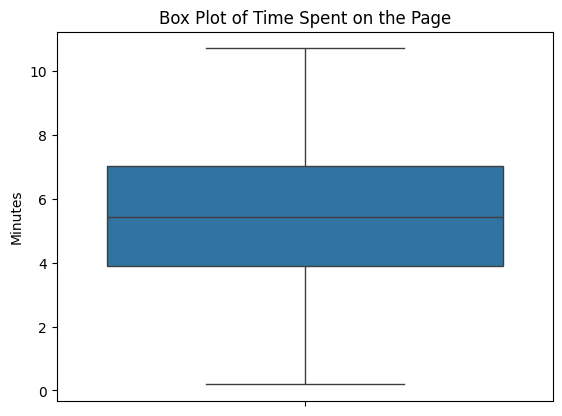

In [ ]:
#Prepare a box plot for time spent on page
sns.boxplot(data=dfnews.time_spent_on_the_page)
# Add labels and title
plt.ylabel('Minutes')
plt.title('Box Plot of Time Spent on the landing Page')
plt.show()

1. There are no outliers
2. Data lies within the range of ~4-7 minutes

In [ ]:
#Check the time on landing page for users on the old page only
dfold=dftest.query('landing_page=="old"')
dfold.head()

user_id    group landing_page  time_spent_on_the_page converted  \
0   546592  control          old                    3.48        no   
3   546567  control          old                    3.02        no   
5   546558  control          old                    5.28       yes   
7   546581  control          old                    6.53       yes   
9   546548  control          old                    2.08        no   

  language_preferred  
0            Spanish  
3             French  
5            English  
7            Spanish  
9            English

In [ ]:
dfold.shape

(50, 6)

In [ ]:
dfnews.group.value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

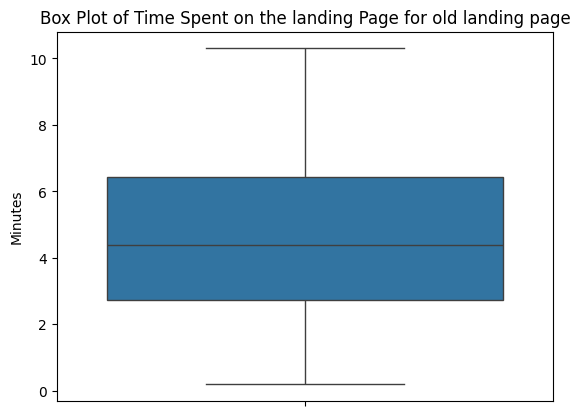

In [ ]:
#Boxplot for landing time_spent_on_the_page for those landing on old landing page
sns.boxplot(data=dfold.time_spent_on_the_page)
# Add labels and title
plt.ylabel('Minutes')
plt.title('Box Plot of Time Spent on the landing Page for old landing page')
plt.show()

1. There are no outliers
2. data lies between ~ 2.3 -6.2

In [ ]:
#Analysis for data on the converted column
dfnews.converted.value_counts()

#sns.histplot(dfnews.converted)

converted
yes    54
no     46
Name: count, dtype: int64

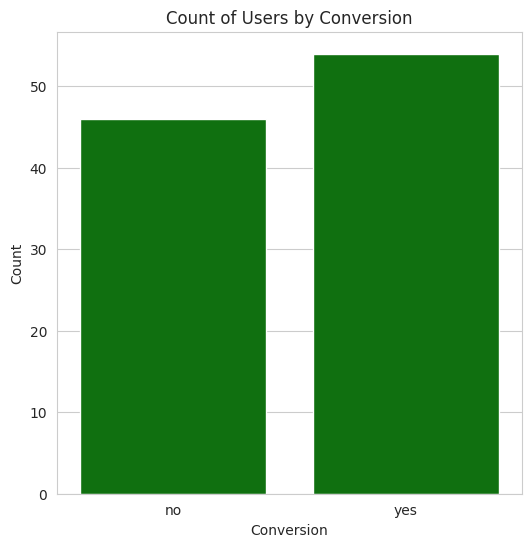

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
ax = sns.countplot(data=dfnews, x='converted',color='green')#, palette='pastel')
plt.title('Count of Users by Conversion')
plt.xlabel('Conversion')
plt.ylabel('Count')
plt.show()

From the counts and the plot above 54% of the users were converted. 46% were not converted.

In [ ]:
#Analysis of language preffered
dfnews.language_preferred.value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

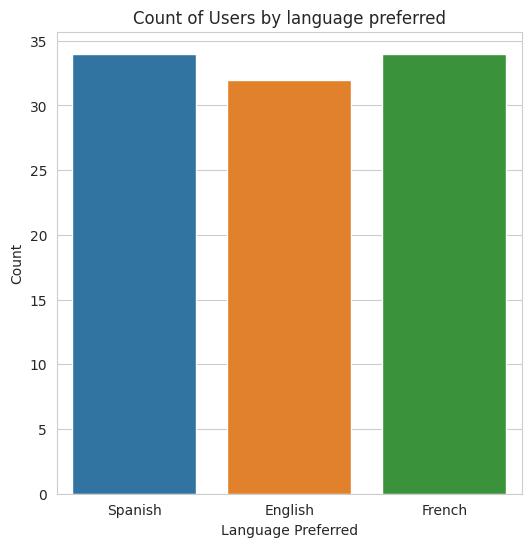

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
ax = sns.countplot(data=dfnews, x='language_preferred',hue="language_preferred" )#color='green')#, palette='pastel')
plt.title('Count of Users by language preferred')
plt.xlabel('Language Preferred')
plt.ylabel('Count')
plt.show()

1. Spanish and French language are marginaly higher in preference compared each at 34% to English at 32%.
2. User are evenly distributed across the 3 languages

### Bivariate Analysis

Time spent on the landing page (Old and New)

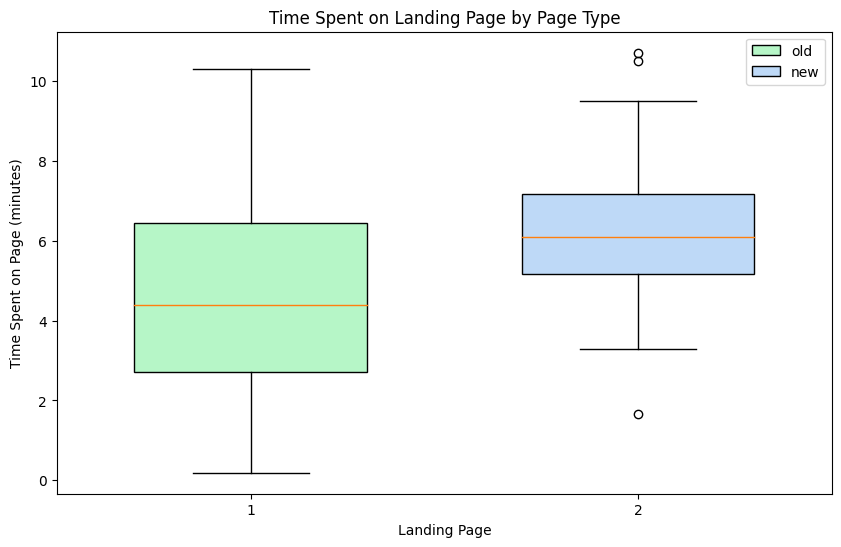

In [ ]:
# Isolate the data for the new and the old landing pages
old_lpg_data = dfnews[dfnews['landing_page'] == 'old']
new_lpg_data = dfnews[dfnews['landing_page'] == 'new']

# Define a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Create boxplots  for the 'old' and 'new' landing pages
oldpage_boxplot_data = ax.boxplot(old_lpg_data['time_spent_on_the_page'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#B6F6C7'))
newpage_boxplot_data = ax.boxplot(new_lpg_data['time_spent_on_the_page'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#BED9F7'))

# Define x-axis and y-axis labels and title
ax.set_xlabel('Landing Page')
ax.set_ylabel('Time Spent on Page (minutes)')
ax.set_title('Time Spent on Landing Page by Page Type')

# Define the legend for the boxplot colors
ax.legend([oldpage_boxplot_data["boxes"][0], newpage_boxplot_data["boxes"][0]], ['old', 'new'])

# Show the boxplots
plt.show()

1. There are 3 outliers in the new landing page.
2. The median for the "old" landing page is slightly lower ~4.5 minutes compared to that of the "new" landing page which is ~6.2 minutes
3. The 75th percentile of time spent on the new was around 7 minutes, meaning that 75% of users spent less than 7 minutes on the landing pages.

**Conversion Vs Time spent on the Page**

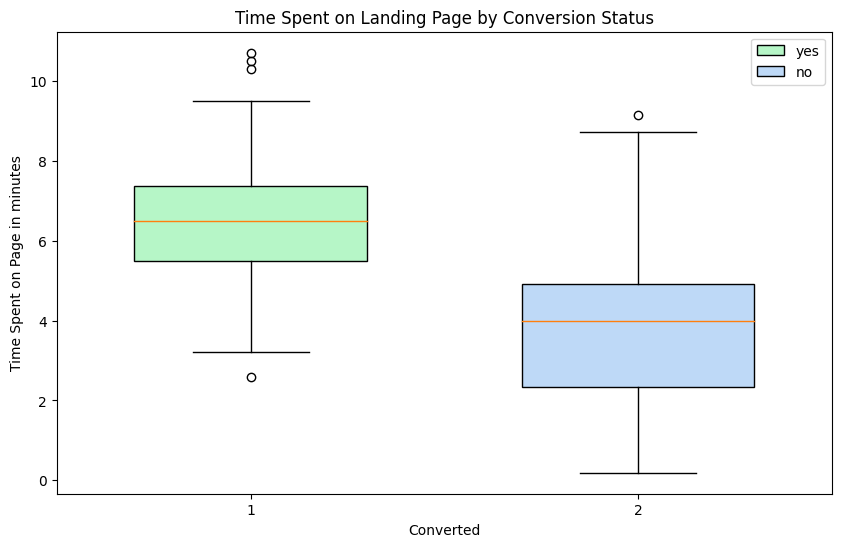

In [ ]:

## We start by doing visualization
#Define a figure and the axis variables/objects
fig, ax = plt.subplots(figsize=(10,6))

# Create boxplot data for the 'converted' values of 'yes' and 'no'
yes_bplot_data = ax.boxplot(dfnews[dfnews['converted'] == 'yes']['time_spent_on_the_page'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#B6F6C7'))
no_bplot_data = ax.boxplot(dfnews[dfnews['converted'] == 'no']['time_spent_on_the_page'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#BED9F7'))

# Set x-axis and y-axis labels and title
ax.set_xlabel('Converted')
ax.set_ylabel('Time Spent on Page in minutes')
ax.set_title('Time Spent on Landing Page by Conversion Status')

# Create a legend for the boxplot colors
ax.legend([yes_bplot_data["boxes"][0], no_bplot_data["boxes"][0]], ['yes', 'no'])

# Show the boxplot
plt.show()

1. The "Yes" group has 4 outliers. The "No" group has 1 outlier
2. The median time spent on page in minutes for the "Yes" group is higher ~6.5 compared to the "No" group at ~4 minutes. This implies that the new page is possibly better than the old page.
3. The total time spent in minutes for the converted is higher ~10 minutes compared to the of not converted at ~9 minutes

**Preffered Language versus Time Spent on the Page**

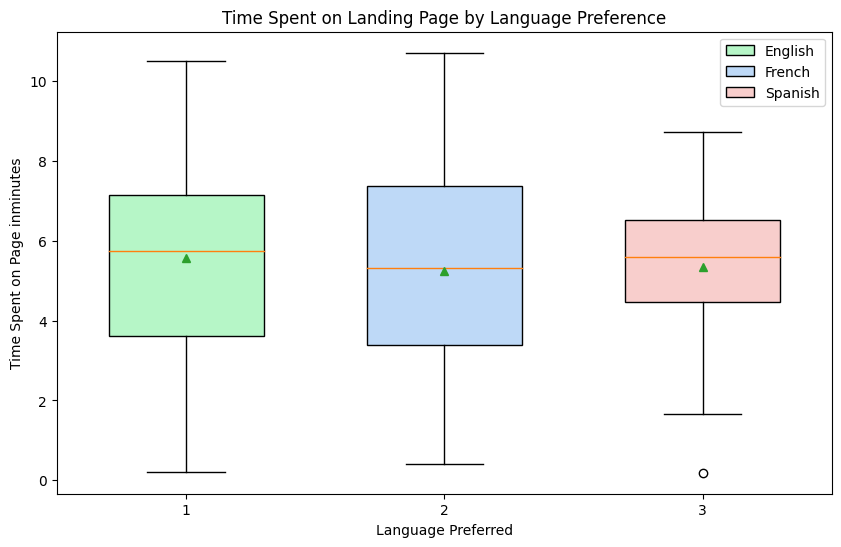

In [ ]:
#Visualisation
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Create boxplot data for each language group
eng_bplot_data = ax.boxplot(dfnews[dfnews['language_preferred'] == 'English']['time_spent_on_the_page'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#B6F6C7'), showfliers=True, showmeans=True)
frn_bplot_data = ax.boxplot(dfnews[dfnews['language_preferred'] == 'French']['time_spent_on_the_page'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#BED9F7'), showfliers=True, showmeans=True)
esp_bplot_data = ax.boxplot(dfnews[dfnews['language_preferred'] == 'Spanish']['time_spent_on_the_page'], positions=[3], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#F8CECC'), showfliers=True, showmeans=True)

# Set x-axis and y-axis labels and title
ax.set_xlabel('Language Preferred')
ax.set_ylabel('Time Spent on Page inminutes')
ax.set_title('Time Spent on Landing Page by Language Preference')

# Create a legend for the boxplot colors
ax.legend([eng_bplot_data["boxes"][0], frn_bplot_data["boxes"][0], esp_bplot_data["boxes"][0]], ['English', 'French', 'Spanish'])

# Show the boxplot
plt.show()

In [ ]:
1. The median time spent on the page for all the three language groups (English, French and Spanish) are close with English having the highest and French the lowest.
2. English has the highest standard deviation (2.62), indicating that there is more variability in the time spent on the page for English speakers compared to French and Spanish speakers.
3. There is 1 outliers in the Spanish group with a time spent on page which is nearly 0 minutes.
4. When we compare, we can deduce that the distributions of time spent on the page for each language group are relatively similar. There are some overlap in the interquartile ranges. Therefore, we can't conclude that language preference has a significant impact on the time spent on the page.


## 1. Do the users spend more time on the new landing page than the existing landing page?


Visualisation

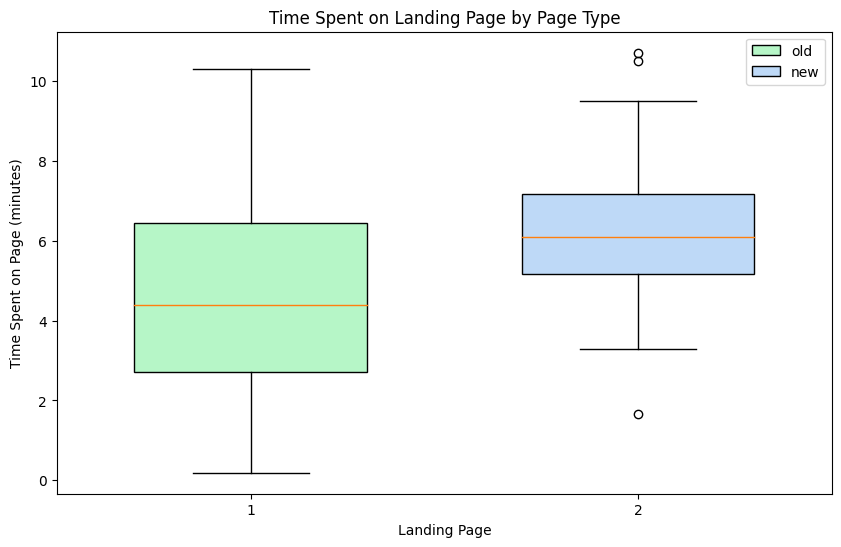

In [ ]:
# Isolate the data for the new and the old landing pages
old_lpg_data = dfnews[dfnews['landing_page'] == 'old']
new_lpg_data = dfnews[dfnews['landing_page'] == 'new']

# Define a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Create boxplots  for the 'old' and 'new' landing pages
oldpage_boxplot_data = ax.boxplot(old_lpg_data['time_spent_on_the_page'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#B6F6C7'))
newpage_boxplot_data = ax.boxplot(new_lpg_data['time_spent_on_the_page'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='#BED9F7'))

# Define x-axis and y-axis labels and title
ax.set_xlabel('Landing Page')
ax.set_ylabel('Time Spent on Page (minutes)')
ax.set_title('Time Spent on Landing Page by Page Type')

# Define the legend for the boxplot colors
ax.legend([oldpage_boxplot_data["boxes"][0], newpage_boxplot_data["boxes"][0]], ['old', 'new'])

# Show the boxplots
plt.show()

The median for the "old" landing page is slightly lower ~4.5 minutes compared to that of the "new" landing page which is ~6.2 minutes. For further investigations, we shall conduct the statistical test below;

### Step 1: Define the null and alternate hypotheses

Let  μ1,  be the the mean time spent on the new landing page and μ2 be the mean time spent on the existing landing page respectively.

Null hypothesis

H0:μ1=μ2

Alternate hypothesis

Ha:μ1>μ2

### Step 2: Select Appropriate test

We shall conduct a one-tailed test for the two population means from two independent populations. Since the standard deviations for the populations are unknown, we will use a Two Independent Sample T-test. We will conduct Shapiro-Wilk’s test to check whether the 'time_spent_on_the_page' variable for both the control and treatment groups follows a normal distirbution or not.

Shapiro-Wilk's Test

H0:  Time spent on the page for control group/ treatment group follows a normal distribution

In [ ]:
#We test if the Time spent on the page for control group/ treatment group follows a normal distribution
from scipy.stats import shapiro

# Subset the data for control group and treatment group
control_df = dfnews[dfnews['group'] == 'control']
treatment_df = dfnews[dfnews['group'] == 'treatment']

# Perform Shapiro-Wilk's test on control group
control_sw = shapiro(control_df['time_spent_on_the_page'])
print("Shapiro-Wilk's test result for control group:", control_sw)

# Perform Shapiro-Wilk's test on treatment group
treatment_sw = shapiro(treatment_df['time_spent_on_the_page'])
print("Shapiro-Wilk's test result for treatment group:", treatment_sw)


Shapiro-Wilk's test result for control group: ShapiroResult(statistic=0.9776089191436768, pvalue=0.45611920952796936)
Shapiro-Wilk's test result for treatment group: ShapiroResult(statistic=0.9857664704322815, pvalue=0.8040016293525696)


Since p-value (~0.456 and ~0.804) of the test is much greater than the level of significance ($\alpha = 0.05$), we **fail to reject the null hypothesis** that the response follows the normal distribution. Therefore, we can conclude that the time_spent_on_the_page variable for both the control and treatment groups **follow a normal distribution**.

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spending on the page is measured on a continuous scale.
* Normally distributed populations - The time_spent_on_the_page variable for both the control and treatment groups follow a normal distribution via Shapiro-Wilk’s test.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, the sample of 100 users was selected randomly.

We can use **two Independent Sample T-test** for this problem.

### Step 3: Decide the significance level

We shall use a significance level of α=0.05 as provided in the problem statement.

### Step 4: Collect and prepare data

In [ ]:
dfnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
# filter data for new landing page users and create a data frame
time_spent_on_the_page_new = dfnews[dfnews['landing_page'] == 'new']['time_spent_on_the_page']

# filter data for old landing page users and create a data frame
time_spent_on_the_page_old = dfnews[dfnews['landing_page'] == 'old']['time_spent_on_the_page']

In [ ]:
print("The sample standard deviation of the time spent on the new page is: ",round(time_spent_on_the_page_new.std(),2))
print("The sample standard deviation of the time spent on the old page is: ",round(time_spent_on_the_page_old.std(),2))

The sample standard deviation of the time spent on the new page is:  1.82
The sample standard deviation of the time spent on the old page is:  2.58


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

# calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_on_the_page_new, time_spent_on_the_page_old, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
#If P value is less that level of significance which is 0.05 then we reject the null hypothesis
if p_value < 0.05:
    print('Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print('Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

The p-value (~0.00013) is much less than the level of significance ( α=0.05 ). We reject the null hypothesis. We therefore have enough evidence to support the claim that users spend more time on the new landing page than the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

We perform a Visual analysis

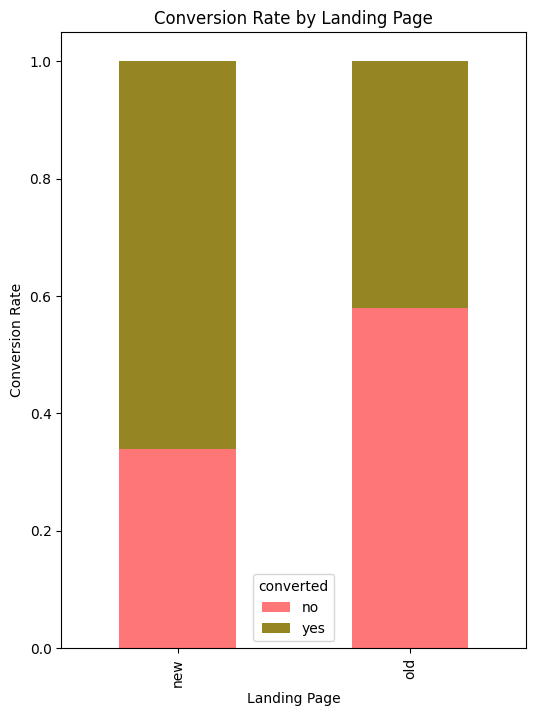

In [ ]:
#Create a crosstab for the data and plt the bar chart
cr = pd.crosstab(dfnews['landing_page'], dfnews['converted'], normalize='index')
cr.plot(kind='bar', figsize=(6,8), stacked=True, color=['#ff7676', '#958623'])
plt.xlabel('Landing Page')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Landing Page')
plt.show()

From the bar chart the conversion rate for the new page is higher than for the old page.

In [ ]:
#We test if the conversion rate for the new is bigger than for the old
dfnews.groupby(['landing_page', 'converted']).size()

landing_page  converted
new           no           17
              yes          33
old           no           29
              yes          21
dtype: int64

Comparatively more users are converted on the new than on the old page.

### Step 1: Define the Null and Alternate Hypothesis

Assume p1  and  p2  be the proportions of users who visit the new landing page and get converted, and the proportions of users who visit the old landing page and get converted, respectively.

We will test the null hypothesis:

H0:p1≤p2

against the alternative hypothesis:

Ha:p1>p2

where  p1  represents the conversion rate for the new landing page and  p2  represents the conversion rate for the old landing page.

We will use hypothesis testing to determine whether there is sufficient evidence to reject the null hypothesis and accept the alternative hypothesis.

### Step 2: Select Appropriate test


This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, we will use a Two Proportion Z-test.

Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted or not converted.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
*   Can the binomial distribution be approximated to normal distribution - Yes.

### Step 3: Decide the significance level
We select α = 0.05 as guided in the business problem.

### Step 4: Collect and prepare data

In [ ]:
# Create an array of converted user counts for old and new landing pages
converted_users_counts = np.array([len(dfnews.loc[(dfnews.landing_page == 'old') & (dfnews.converted == 'yes')]),
                            len(dfnews.loc[(dfnews.landing_page == 'new') & (dfnews.converted == 'yes')])])

# Create and array of sample sizes - we know sample sizes from problem statement
sample_sizes = np.array([50, 50])

In [ ]:
print(converted_users_counts)
print(sample_sizes)

[21 33]
[50 50]


### Step 5: Calculate the p-value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Calculate p-value using ttest_ind()
test_stat, p_value = proportions_ztest(converted_users_counts, sample_sizes)

print('The calculated p-value is', p_value) # print p-value

The calculated p-value is 0.016052616408112556


### Step 6: Compare the p-value with  α

p-value 0.016 and is less that the significance level value of 0.05. We therefore reject the null hypothesis

### Step 7: Inferences

p-Value is less that 0.05, the level of significance. We therefore reject the hypothesis since we do not have sufficient evidence that the conversion for the group on the new page is less than that of the old page.

## 3. Is the conversion and preferred language are independent or related?

### Begin with Visual Analysis

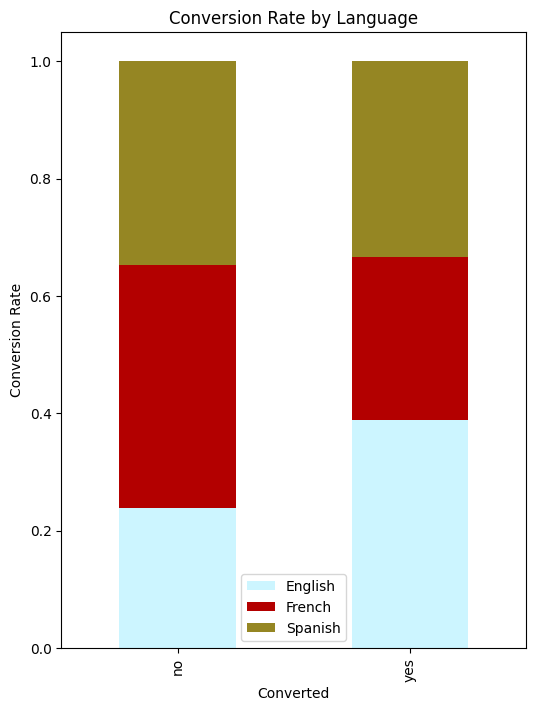

In [ ]:
pd.crosstab(dfnews['converted'], dfnews['language_preferred'], normalize='index').plot(kind="bar", figsize=(6,8), stacked=True, color=['#ccf5ff', '#b30000', '#958623'])
plt.legend()
plt.xlabel('Converted')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Language')
plt.show()

From the chart above, the conversion for French speakers is lower than that of other languages.

### Step 1: Define the Null and Alternate Hypotheses

We define the hyptheses as below

Null Hypotheses:
H0:  Conversion status and preferred language are independent

The alternate hypotheses:

Ha: Conversion status and preferred language are not independent

### Step 2: Select Appropriate test

This problem requires a test of independence. It concerns two categorical variables - converted status and preferred language. The Chi-Square Test for Independence will be used.

Are the Assumptions Satisfied?



*   Categorical variables - Yes
*   Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
*   Random sampling from the population - Yes, a sample of 100 users was random selected.

### Step 3: Decide the significance level

As provided for in the problem statement, we use  α = 0.05.

### Step 4: Collect data

In [ ]:
cont_table = pd.crosstab(dfnews['converted'], dfnews['language_preferred'])
cont_table

language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18

### Step 5: Calculate the p_value

In [ ]:
from scipy.stats import chi2_contingency

# calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(cont_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with  α

p-value is greater than 0.05. We fail to reject the null hypotheses

### Step 7: inferences

Therefore As the p-value (~0.21) is greater than the level of significance ($\alpha = 0.05$) we **fail to reject the null hypothesis**. We not not have enough evidence to suggest a relationship between the conversion and preferred language variables.  **The conversion status and preferred language are independent of each other.**

## 4. Is the time spent on the new page same for the different language users?

Begin by performing the visual analysis

In [ ]:
# Filter data to a new DataFrame for users who got served the new page
df_newpg = dfnews[dfnews['landing_page'] == 'new']
df_newpg.head()


user_id      group landing_page  time_spent_on_the_page converted  \
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
4   546459  treatment          new                    4.75       yes   
6   546448  treatment          new                    5.25       yes   
8   546461  treatment          new                   10.71       yes   

  language_preferred  
1            English  
2            Spanish  
4            Spanish  
6             French  
8             French

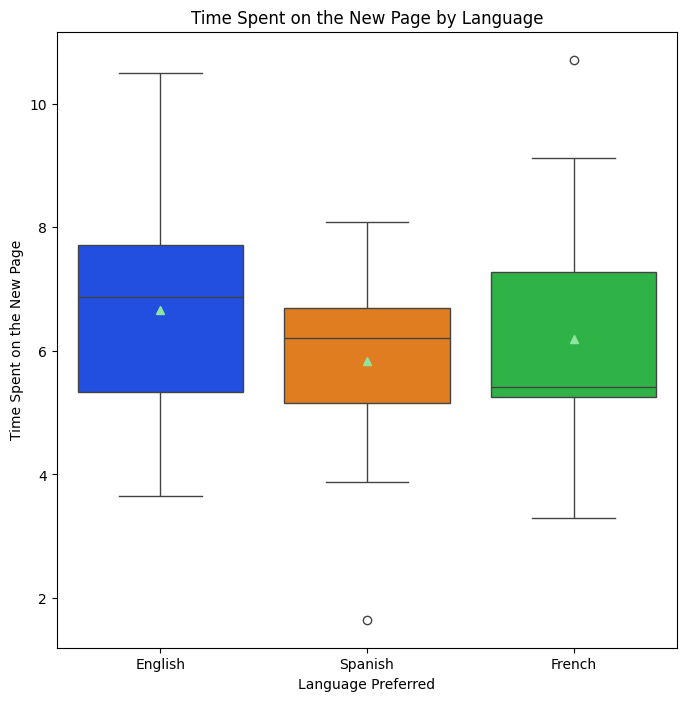

In [ ]:
#Set colour pallete
palette="bright"

#Create the boxplot
plt.figure(figsize=(8,8))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', showmeans=True, data=df_newpg, palette=palette, hue='language_preferred')

#Add labels and title
plt.xlabel('Language Preferred')
plt.title('Time Spent on the New Page by Language')
plt.ylabel('Time Spent on the New Page')
plt.show()

In [ ]:
#Calculate the means for different languages
dfnews.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

From the Boxplot and the calculations of the means above, its clear the means for the different languages, English, Spanish and French are close to each other at ~5.6,5.3 and 5.3 respectively.

### Step 1: Define the Null and alternate hypotheses

Assume  μ1,μ2,μ3  are the means of time spent on the page for users who prefer English, French and Spanish respectively.

Null hypothesis:

H0:μ1=μ2=μ3

Alternative hypothesis

Ha:  The means for time spent on the page for users preferring different languages are different.

### Step 2: Select Appropriate Test

The problem concerns three population means. **one way ANNOVA F-Test** will be used to compare the three population means subject to fulfilling the conditions below.

1. We will use the **Shapiro-Wilk's test** to check if the 'time_spent_on_the_page' variable follows a normal distribution

2. We shall use the **Levene's test** to check the homogeneity of variances.

### Shapiro Wilk's Test

We test the Null hypotheses

>$H_0:$ Time spent on the page has a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the page does not have a normal distribution


In [ ]:
# Testing of Assumption 1: Normality
# import the required function from scipy
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(dfnews['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.5643193125724792


The p-values is large, we fail to reject the null hypotheses.

### Levene’s test

We test the null hypothesis

H0 : All the population variances are equal

against the alternative hypothesis

Ha : At least one variance is different

In [ ]:
#We test Assumption 2: Homogeneity of Variance
#import the required function from scipy
from scipy.stats import levene
statistic, p_value = levene( dfnews['time_spent_on_the_page'][dfnews['language_preferred']=="English"],
                                   dfnews['time_spent_on_the_page'][dfnews['language_preferred']=="French"],
                                   dfnews['time_spent_on_the_page'][dfnews['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


The p-value is large. We fail to reject the null hypotheses.
All the conditions for chi test are satisfied including
1. Homogeneity of variance.
2. Samples were randomly selected.
3. The population are normally distributed.

### Step 3: Decide the Significance level

As guided in the problem statement, we shall use α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# create a subsetted data frame of the time spent on the new page by English language users
time_spent_newpg_English = dfnews[dfnews['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_newpg_French = dfnews[dfnews['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_newpg_Spanish = dfnews[dfnews['language_preferred']=="Spanish"]['time_spent_on_the_page']


In [ ]:
#Import the required function from scipy
from scipy.stats import f_oneway

#Calculate p-value
test_stat, p_value = f_oneway(time_spent_newpg_English, time_spent_newpg_French, time_spent_newpg_Spanish)

print('The p-value is', p_value)

The p-value is 0.8665610536012648


### Step 6: Compare the p-value with  α

The p-value is greater than level of significance of 0.05. We fail to reject the null hypotheses

### Step 7: Inferences

The p-value (~0.867) is greater than the level of significance ( α=0.05 ), we fail to reject the null hypothesis. We therefore infer that there is not enough evidence to suggest the mean time spent on the new page is different for at least one language user. The data suggests that the mean time spent on the new page is the same for all language users.

## Conclusion and Business Recommendations

### Conclusions

___

100 users were randomly selected and divided equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). After analysis the sample data we observed the following

1. Time_spent_on_the_page has a mean of time_spent_on_the_page and a standard deviation of 2.378

2. Time_spent_on_the_page has a minimum of 0.19 and a maximum of 10.71. Meaning that the user that spent the least time on the page spent 0.19 minutes while the one spending most time was there for 10.71 minutes

3. In the numerical variable, 'time_spent_on_the_page', the mean is close to the median (50th percentile) suggesting that the data is approximately normally distributed or symmetrically distributed.

4. The IQR (the difference between the 75th and 25th percentile values) is between 3.88 and 7.02. Assuming it is a normal distribution, approximately 68% of the data falls within one standard deviation of the mean.
5. Spanish and French language are marginaly higher in preference compared each at 34% to English at 32%. However users are evenly distributed across the 3 languages
6. The median for the tome spent on the "old" landing page is slightly lower ~4.5 minutes compared to that of the "new" landing page which is ~6.2 minutes
7. The 75th percentile of time spent on the new was around 7 minutes, meaning that 75% of users spent less than 7 minutes on the landing pages.

8. The median time spent on page in minutes for the converted group is higher ~6.5 compared to the not converted group at ~4 minutes. This implies that the new page is possibly better than the old page.

9. Regarding the question whether "users spend more time on the new landing page than the existing landing page." The p-value (~0.00013) is much less than the level of significance ( α=0.05 ). We reject the null hypothesis. We therefore have enough evidence to support the claim that users spend more time on the new landing page than the old landing page.

10. On the question whether the "conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page." The p-Value is less that 0.05, the level of significance. We therefore reject the hypothesis since we do not have sufficient evidence that the conversion for the group on the new page is less than that of the old page.

11.  Regarding whether "the conversion and preferred language are independent or related?" Since the p-value (~0.21) is greater than the level of significance ($\alpha = 0.05$) we fail to reject the null hypothesis**. We not not have enough evidence to suggest a relationship between the conversion and preferred language variables.  The conversion status and preferred language are independent of each other.

12. About the question on whether "the time spent on the new page same for the different language users?" Since the p-value (~0.43) is greater than the level of significance ($\alpha = 0.05$), we **fail to reject the null hypothesis**. Hence, we can conclude that there is not enough evidence to suggest the mean time spent on the new page is different for at least one language user. The data suggests that the mean time spent on the new page is the same for all language users.


Business Recommendations

Recomendations on the new landing page:--

It was confirmed thata the new landing page attracts users to spend more time on the page and the conversion rate is greater than before. It is therefore recommended that the new page be implemented.

User experience:--

Consider improving the overall user experience on the landing page, including page load speed, browser optimization, develop mobile device friendly pages, improve ease of navigation, and readability of content. This may help improve user engagement and conversion rates.

Language strategies:--

It was observed that language has no significant bearing on the time spent on the page and the conversion rate. Therefore, there may not be a need to utilise time to develop language-specific pages or marketing campaigns. It is however recommended that tuser preferences be monitored and adjusted  as needed.

Monitoring and analyzing user behavior:--

The data suggested that conversion is not dependent on whether a user accesses the new or the old page. It is therefore recommened that we continue to monitor the time spent on the page and the conversion rate to identify any changes or trends that may arise over time. It is also important that further studies be conducted to determine other factors that influence conversion rates and time spent on the page, such as user demographics (age, sex etc), interests, level of education, browsers used, devices used to acces the pages or other aspects of the user experience. Obtaining user feedback on the new landing page is also crutial to provide valuable insights into what users like and dislike about the new page, and can help identify areas for improvement.
